## Predict housing price in Seattle

**Data Source** https://www.kaggle.com/harlfoxem/housesalesprediction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**Column definitions** https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html
- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# improve how pandas numbers are displayed
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)

In [3]:
# load the data set
df = pd.read_csv("https://github.com/giedriusblazys/SDA_DS_class/blob/main/practice/input/kc_house_data.csv?raw=true")
# df = pd.read_csv("input/kc_house_data.csv")

## EDA (exploratory data analysis)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


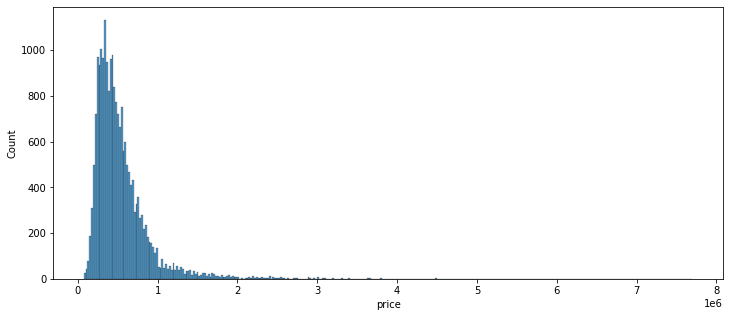

In [7]:
def plot_hist(x):
    plt.figure(figsize=(12,5))
    plt.tight_layout()
    sns.histplot(x)
    plt.show()

plot_hist(df['price'])

In [8]:
df["ln_price"] = np.log(df.price)

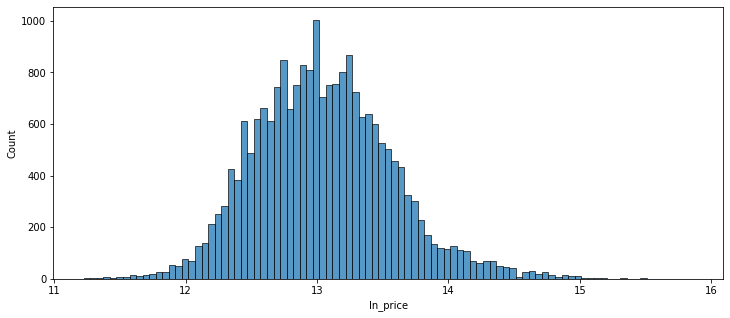

In [9]:
plot_hist(df['ln_price'])

In [10]:
# Convert logarithmic price back to actual and compare to initial price
df["price_conv"] = np.exp(df.ln_price)
df[["price", "price_conv"]].head()

,price,price_conv
0,221900.000,221900.000
1,538000.000,538000.000
2,180000.000,180000.000
3,604000.000,604000.000
4,510000.000,510000.000


In [11]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
            'waterfront', 'view','condition','grade','sqft_above','sqft_basement',
            'yr_built','yr_renovated', 'sqft_living15','sqft_lot15']

def corr_plot(mat, title='My Title', color='cividis'):
    plt.subplots(figsize=(14, 11))
    plt.title(title,fontsize=22)

    sns.heatmap(mat,linewidths=0.2,vmax=0.7,square=True,cmap=color, 
                linecolor='w',annot=True,annot_kws={'size':9},cbar_kws={'shrink': .5})


In [12]:
corr_matrix = df[features].corr()

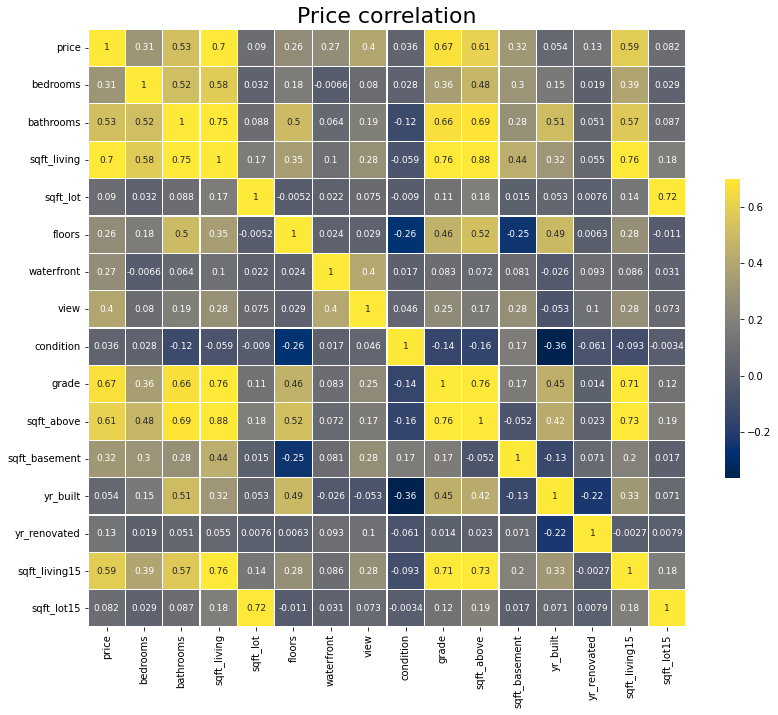

In [13]:
corr_plot(corr_matrix, "Price correlation")

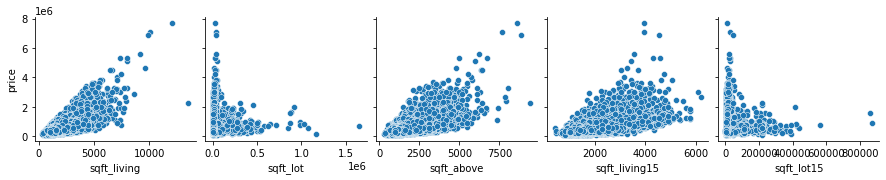

In [43]:
sns.pairplot(data=df, x_vars=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], y_vars=["price"])

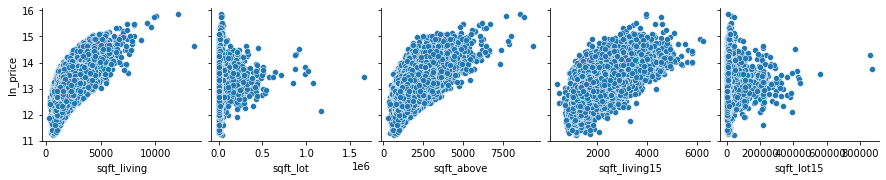

In [44]:
sns.pairplot(data=df, x_vars=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], y_vars=["ln_price"])

In [32]:
y = df.price     # target, endogeneous variable, output, dependent variable
idx_no_out = df.price < 3_000_000
x = df[['sqft_living', 'waterfront',  'view', 'bathrooms', 'condition', 'grade', 'lat', 'long', 'zipcode']] # features, exogneous variables, inputs, independent variables
y = y[idx_no_out].copy()
x = x[idx_no_out].copy()

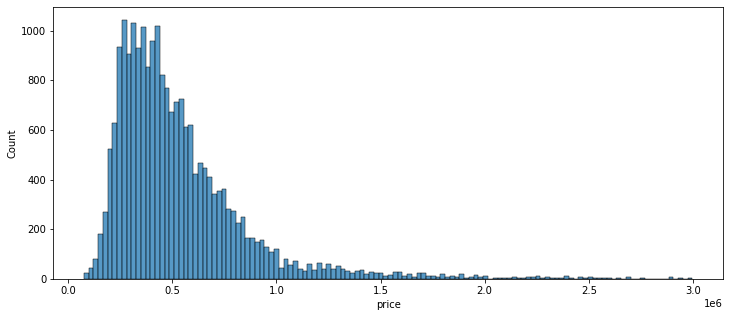

In [33]:
plot_hist(y)

### Testing statsmodels.api

In [34]:
import statsmodels.api as sm 
x_train = sm.add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
model = sm.OLS(y, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     5012.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:14:58   Log-Likelihood:            -2.9227e+05
No. Observations:               21563   AIC:                         5.846e+05
Df Residuals:                   21553   BIC:                         5.846e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.621e+07   2.44e+06    -10.750      0.000    -3.1e+07   -2.14e+07
sqft_living   154.4339      2.592     59.589      0.000     149.354     159.514
waterfront   4.046e+05    1.7e+04     23.753      0.000    3.71e+05    4.38e+05
view         6.455e+04   1921.601     33.592      0.000    6.08e+04    6.83e+04
bathrooms   -1.142e+04   2598.508     -4.394      0.000   -1.65e+04   -6323.980
condition    4.826e+04   2006.182     24.054      0.000    4.43e+04    5.22e+04
grade        9.331e+04   1753.648     53.211      0.000    8.99e+04    9.68e+04
lat          6.642e+05   9674.090     68.657      0.000    6.45e+05    6.83e+05
long        -2.518e+05   1.12e+04    -22.512      0.000   -2.74e+05    -2.3e+05
zipcode      -375.3251     30.087    -12.475      0.000    -434.299    -316.352
==============================================================================
Omnibus:                    10382.756   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122181.488
Skew:                           2.022   Prob(JB):                         0.00
Kurtosis:                      13.938   Cond. No.                     1.88e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation

- coef - shows the effect of feature on target (price)
- const - intercept (not meaningful in itself)
- R-squared - show what share of price variation can be explained by the mode - the bigger the value, the more predictive power model has (max at 1)

### Using sklearn

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

def rmse(y_test, y_pred):
    """root mean squared error"""
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

def mape(y_test, y_pred):
    return round(mean_absolute_percentage_error(y_test, y_pred), 3)

In [37]:
# Let's use 70% of random sample to train the model, and the remaining 30% of sample to test how good is the model
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size = 0.7, random_state=412)

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'MAPE: {mape(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.253
RMSE: 190822.582


In [38]:
(0.316-0.268)/0.316

0.15189873417721514

### Is log-linear model better?

[Smaller error means better model]

In [39]:
y_train_log = np.log(y_train)
lr_log = LinearRegression()
reg_log = lr_log.fit(X_train, y_train_log)
y_pred_log = reg_log.predict(X_test)
y_pred_v2 = np.exp(y_pred_log)
print(f'MAPE: {mape(y_test, y_pred_v2)}')
print(f'RMSE: {rmse(y_test, y_pred_v2)}')

MAPE: 0.212
RMSE: 185005.36


### No free lunch theorem at play:

In [40]:
y_test_mean = np.mean(y_test)
idx_high_p = y_test > y_test_mean # let's create an index for houses in the test sample with prices more than the average

In [41]:
print('Model performance for expensive houses')
print(f'RMSE - log-linear model: {rmse(y_test[idx_high_p], y_pred_v2[idx_high_p])}')
print(f'RMSE - linear model:     {rmse(y_test[idx_high_p], y_pred[idx_high_p])}')
print(f'MAPE - log-linear model: {mape(y_test[idx_high_p], y_pred_v2[idx_high_p])}')
print(f'MAPE - linear model:     {mape(y_test[idx_high_p], y_pred[idx_high_p])}')

Model performance for expensive houses
RMSE - log-linear model: 277320.705
RMSE - linear model:     264897.219
MAPE - log-linear model: 0.214
MAPE - linear model:     0.183


In [42]:
print('Model performance for cheaper houses')
print(f'RMSE - log-linear model: {rmse(y_test[~idx_high_p], y_pred_v2[~idx_high_p])}')
print(f'RMSE - linear model:     {rmse(y_test[~idx_high_p], y_pred[~idx_high_p])}')
print(f'MAPE - log-linear model: {mape(y_test[~idx_high_p], y_pred_v2[~idx_high_p])}')
print(f'MAPE - linear model:     {mape(y_test[~idx_high_p], y_pred[~idx_high_p])}')

Model performance for cheaper houses
RMSE - log-linear model: 92371.202
RMSE - linear model:     126847.701
MAPE - log-linear model: 0.211
MAPE - linear model:     0.296


In [45]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [49]:
price_averages = df.groupby('zipcode')['price'].mean()
price_averages.sort_values().tail(20)

zipcode
98122    634360.179
98052    645231.456
98008    645507.378
98177    676185.392
98053    678163.059
98077    682774.879
98074    685605.776
98075    790576.655
98199    791820.808
98033    803719.523
98005    810164.875
98119    849448.016
98006    859684.779
98105    862825.231
98109    879623.624
98102    901258.267
98112   1095499.342
98040   1194230.021
98004   1355927.082
98039   2160606.600
Name: price, dtype: float64

In [120]:
idx_zip98105 = (df['zipcode'] == 98105)
# my_df = df[idx_zip98105].copy()
my_df = df.copy()

my_df.size


497099

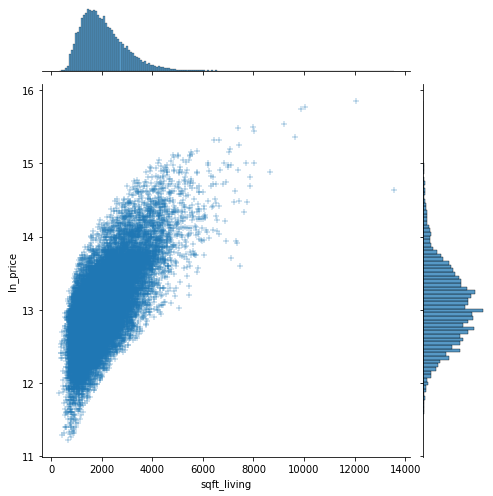

In [121]:
sns.jointplot(x='sqft_living',y='ln_price', data=my_df, height=7, alpha=.8, marker='+')
plt.show()

In [122]:
my_df['sq_1'] = my_df['sqft_living']/1000
for i in range(2, 20):
  my_df['sq_'+str(i)] = my_df['sq_1']*my_df['sq_'+str(i-1)]

In [123]:
my_df.filter(like = 'sq_').head()

,sq_1,sq_2,sq_3,sq_4,sq_5,sq_6,sq_7,sq_8,sq_9,sq_10,sq_11,sq_12,sq_13,sq_14,sq_15,sq_16,sq_17,sq_18,sq_19
0,1.180,1.392,1.643,1.939,2.288,2.700,3.185,3.759,4.435,5.234,6.176,7.288,8.599,10.147,11.974,14.129,16.672,19.673,23.214
1,2.570,6.605,16.975,43.625,112.115,288.137,740.512,1903.115,4891.005,12569.883,32304.599,83022.820,213368.647,548357.423,1409278.577,3621845.942,9308144.070,23921930.261,61479360.771
2,0.770,0.593,0.457,0.352,0.271,0.208,0.160,0.124,0.095,0.073,0.056,0.043,0.033,0.026,0.020,0.015,0.012,0.009,0.007
3,1.960,3.842,7.530,14.758,28.925,56.694,111.120,217.795,426.879,836.683,1639.898,3214.200,6299.831,12347.670,24201.432,47434.807,92972.223,182225.556,357162.090
4,1.680,2.822,4.742,7.966,13.383,22.483,37.772,63.456,106.606,179.099,300.886,505.489,849.221,1426.691,2396.841,4026.693,6764.844,11364.938,19093.096


In [124]:
x = my_df.filter(like = 'sq_')
y = my_df['ln_price']
X_tr,X_te,y_tr,y_te=train_test_split(x,y,train_size = 0.7, random_state=42)
X_train,X_test,y_train,y_test=X_tr,X_te,y_tr,y_te

In [125]:
def fit_model(X_train,X_test,y_train,y_test):
    lr.fit(X_train,y_train)
    y_pred_train = lr.predict(X_train)
    y_pred = lr.predict(X_test)

    rmse_train = round(np.sqrt(mean_squared_error(y_train, y_pred_train)),3)
    rmse_test = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
    
    return y_pred_train,y_pred,rmse_train,rmse_test

def plot_fit(X_train,X_test,y_train,y_test, y_pred_train):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].scatter(X_train['sq_1'], y_train, color='gray', alpha=0.3)
    axes[0].scatter(X_train['sq_1'], y_pred_train, color='red', alpha=0.3)
    axes[1].scatter(X_test['sq_1'], y_test, color='gray', alpha=0.3)
    axes[1].scatter(X_test['sq_1'], y_pred, color='red', alpha=0.3)
    axes[0].title.set_text('Train Sample')
    axes[1].title.set_text('Test Sample')
    fig.tight_layout()
    plt.show()

In [126]:
eval_df = pd.DataFrame(
    {'Model': [], 
     'Details':[],                   
     'RMSE (train)':[],
     'RMSE (test)':[],
    })

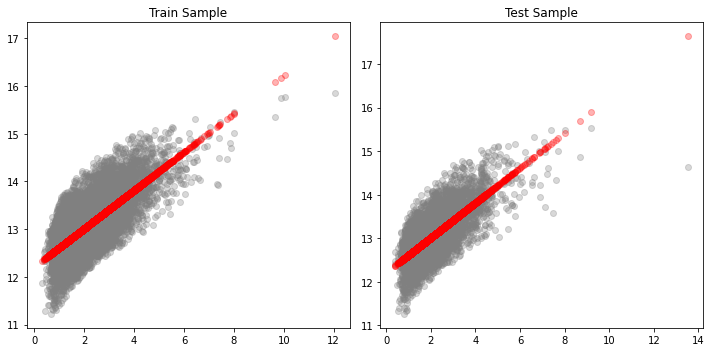

In [127]:
X_train,X_test=X_tr.filter(regex='sq_[1]$'),X_te.filter(regex='sq_[1]$')
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[1] = ['Simple linear regression', '1st degree polynomial', rmse_train,rmse_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

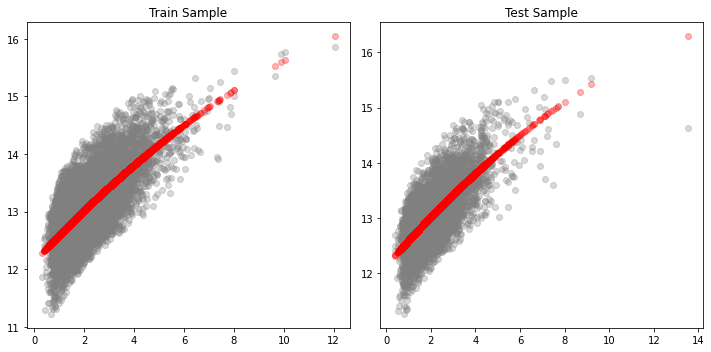

In [128]:
X_train,X_test=X_tr.filter(regex='sq_[12]$'),X_te.filter(regex='sq_[12]$') #Regex 
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[2] = ['Simple linear regression', '2nd degree polynomial', rmse_train,rmse_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

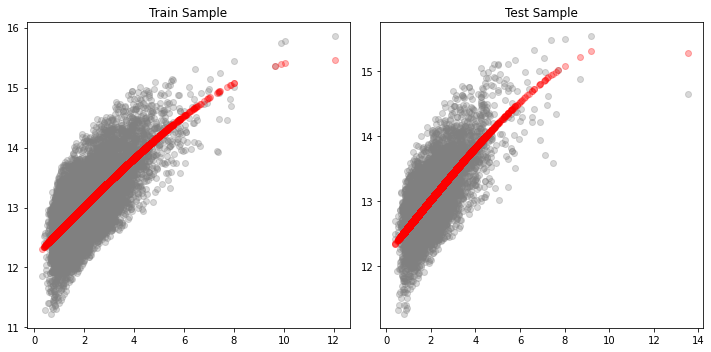

In [129]:
X_train,X_test=X_tr.filter(regex='sq_[123]$'),X_te.filter(regex='sq_[123]$') #Regex 
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[3] = ['Simple linear regression', '3rd degree polynomial', rmse_train,rmse_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

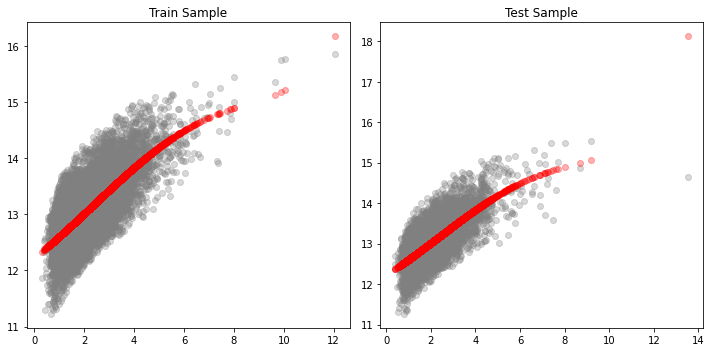

In [130]:
X_train,X_test=X_tr.filter(regex='sq_[1-5]$'),X_te.filter(regex='sq_[1-5]$') #Regex 
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[4] = ['Simple linear regression', '5th degree polynomial', rmse_train,rmse_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

In [131]:
X_train.head()

,sq_1,sq_2,sq_3,sq_4,sq_5
167,2.680,7.182,19.249,51.587,138.253
12412,2.340,5.476,12.813,29.982,70.158
7691,2.190,4.796,10.503,23.003,50.376
12460,2.260,5.108,11.543,26.088,58.958
9099,2.110,4.452,9.394,19.821,41.823


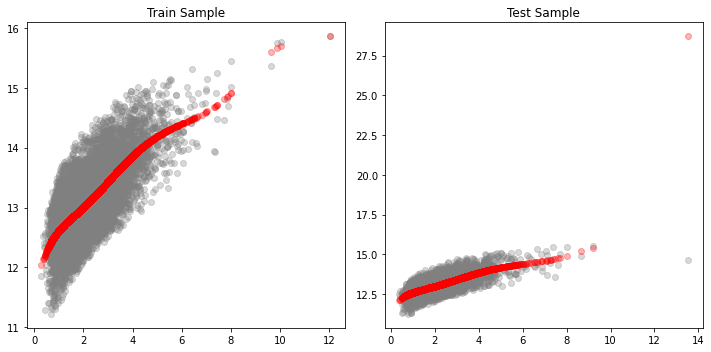

In [132]:
X_train,X_test=X_tr.filter(regex='sq_[1-9]$'),X_te.filter(regex='sq_[1-9]$') #Regex 
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[5] = ['Simple linear regression', '9th degree polynomial', rmse_train,rmse_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

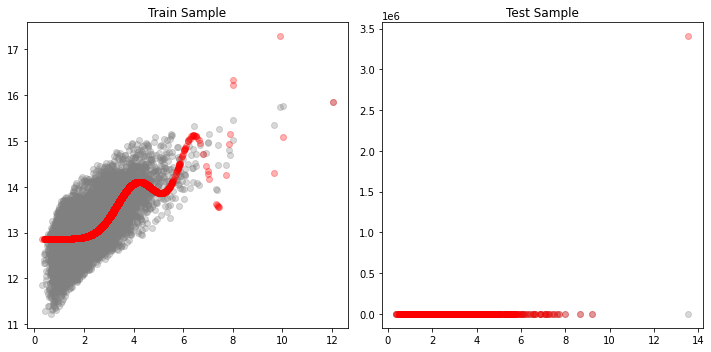

In [134]:
X_train,X_test=X_tr,X_te #Regex 
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[6] = ['Simple linear regression', '19th degree polynomial', rmse_train,rmse_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

In [135]:
eval_df

,Model,Details,RMSE (train),RMSE (test)
1,Simple linear regression,1st degree polynomial,0.377,0.383
2,Simple linear regression,2nd degree polynomial,0.376,0.381
3,Simple linear regression,3rd degree polynomial,0.376,0.380
4,Simple linear regression,5th degree polynomial,0.376,0.382
5,Simple linear regression,9th degree polynomial,0.375,0.418
6,Simple linear regression,19th degree polynomial,0.409,42288.454
